In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

We randomly generate 4 clusters.

In [2]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)

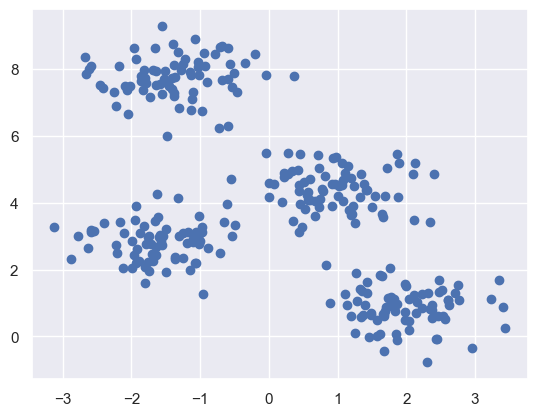

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
gmm = GaussianMixture(n_components=4)
labels = gmm.fit_predict(X)

C:\Users\yong\anaconda3\envs\textmining49\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [5]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
anyio                         3.7.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astor                         0.8.1
asttokens                     2.2.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bertopic                      0.15.0
bleach                        6.0.0
blinker                       1.6.2
blis                          0.7.9
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2023.5.7
cffi                          1.15.1
charset-normalizer            2.1.1
click      

In [5]:
labels

array([3, 2, 1, 2, 3, 3, 0, 1, 2, 2, 0, 2, 1, 2, 3, 1, 1, 3, 0, 0, 3, 3,
       1, 0, 0, 1, 3, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 3, 1, 0, 1, 1,
       0, 0, 2, 0, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 2, 3, 2, 1, 2, 0, 0, 0,
       2, 3, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 3, 1,
       2, 2, 1, 3, 2, 0, 0, 1, 3, 3, 1, 0, 2, 3, 2, 3, 1, 3, 3, 1, 2, 1,
       0, 0, 3, 2, 3, 1, 2, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 0,
       0, 3, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1,
       3, 0, 2, 0, 3, 1, 2, 1, 1, 3, 1, 0, 0, 1, 3, 1, 1, 2, 3, 1, 0, 2,
       3, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 2, 1, 0, 3, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 3, 3, 1,
       2, 3, 3, 0, 3, 0, 1, 2, 2, 1, 1, 2, 1, 3, 0, 1, 3, 0, 2, 0, 3, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 1, 0, 3, 1, 0, 0, 0, 3, 3, 2, 1, 1, 0, 3,
       2, 0, 1, 2, 1, 3, 3, 0, 0, 1, 3, 3, 3, 1, 2, 2, 3, 3, 1, 3, 3, 3,
       2, 0, 2, 1, 3, 3, 2, 2, 2, 3, 3, 1, 2, 0], d

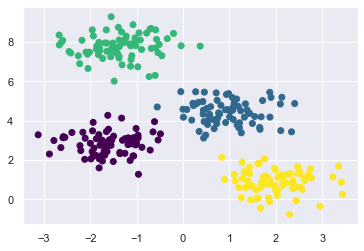

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [7]:
np.set_printoptions(suppress=True)
gmm.predict_proba(X)

array([[0.0023814 , 0.02592964, 0.        , 0.97168896],
       [0.        , 0.00000001, 0.99999999, 0.        ],
       [0.00000001, 0.99999997, 0.00000002, 0.        ],
       ...,
       [0.0000341 , 0.99996589, 0.00000001, 0.        ],
       [0.        , 0.00000301, 0.99999699, 0.        ],
       [0.99999956, 0.00000044, 0.        , 0.        ]])

In [8]:
labels[0]

3

The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).

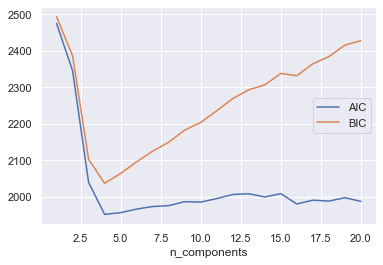

In [18]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components');